# ESOL Dataset - Molecular Solubility Prediction

## Exploratory Data Analysis

In [ ]:
#

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import rdkit
from rdkit import Chem

In [2]:
# Download directly into your raw data folder
url = "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/delaney-processed.csv"

data = pd.read_csv(url)

# Save to data/raw/
data.to_csv("/Users/sarvesh/Desktop/GitHub/molecular-property-prediction/data/raw/esol.csv", index=False)
data.head()


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [3]:
# Step 1: Basic Exploration
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
pd.DataFrame(data.columns)


Rows: 1128, Columns: 10


,0
0,Compound ID
1,ESOL predicted log solubility in mols per litre
2,Minimum Degree
3,Molecular Weight
4,Number of H-Bond Donors
5,Number of Rings
6,Number of Rotatable Bonds
7,Polar Surface Area
8,measured log solubility in mols per litre
9,smiles


In [4]:
data.dtypes

Compound ID                                         object
ESOL predicted log solubility in mols per litre    float64
Minimum Degree                                       int64
Molecular Weight                                   float64
Number of H-Bond Donors                              int64
Number of Rings                                      int64
Number of Rotatable Bonds                            int64
Polar Surface Area                                 float64
measured log solubility in mols per litre          float64
smiles                                              object
dtype: object

0

In [4]:
# Rename target column
data = data.rename(columns={"measured log solubility in mols per litre": "target"})
data[["smiles", "target"]].head()


,smiles,target
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,CC(C)=CCCC(C)=CC(=O),-2.06
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,c1ccsc1,-1.33


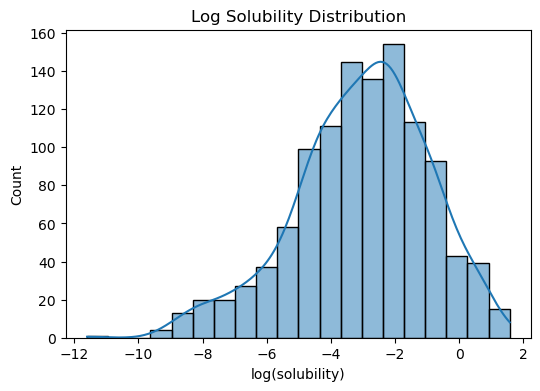

In [5]:
# Step 2: Plot target property distribution

plt.figure(figsize=(6,4))
sns.histplot(data["target"], kde=True, bins=20)
plt.title("Log Solubility Distribution")
plt.xlabel("log(solubility)")
plt.show()
